In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [6]:
### 特征值和特征向量  https://www.cnblogs.com/zwt20120701/p/11008275.html
### 成对出现

A = np.matrix([[3, 7],[2, 5]])
inva = np.linalg.inv(A)
print('矩阵的逆', inva)
print('矩阵和逆矩阵点乘:', A.dot(inva))

eigvals, eigvecs = (np.linalg.eig(A))
print('特征值:' , eigvals)
print('特征向量:', eigvecs)
print('对角矩阵:', np.diag(eigvals))
## 知道特征值和特征向量后, 就可以进行逆向运算,计算原始的矩阵,公式如下:
S = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
print(S)

矩阵的逆 [[ 5. -7.]
 [-2.  3.]]
矩阵和逆矩阵点乘: [[ 1.00000000e+00 -1.33226763e-15]
 [ 6.66133815e-16  1.00000000e+00]]
特征值: [0.12701665 7.87298335]
特征向量: [[-0.92511345 -0.82071729]
 [ 0.37969079 -0.57133452]]
对角矩阵: [[0.12701665 0.        ]
 [0.         7.87298335]]
[[3. 7.]
 [2. 5.]]


In [7]:
### 模拟特征值丢失现象
## Ax=rx --> r特征值, x特征向量
## A = rx*(x的逆)
arr = np.matrix([[1, 6, 3, 7],[3, 8, 4, 6], [1, 4, 9, 5], [6, 8, 3, 5]])
print('原始矩阵:', arr, sep='\n')
## 提取特征和特征向量
eigvals, eigvecs = np.linalg.eig(arr)
print('特征值:', eigvals, sep='\n')
print('特征向量:', eigvecs, sep='\n')
diag = np.diag(eigvals)
print('对角阵', diag, sep='\n')
## 逆运算,推算原始矩阵
S = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
print('逆运算,计算原始矩阵:', S, sep='\n')

## 模拟特征值丢失第四个元素值
eigvals[3:] = 0
S = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
print('逆运算,计算原始矩阵(丢失部份特征):', S, sep='\n')

原始矩阵:
[[1 6 3 7]
 [3 8 4 6]
 [1 4 9 5]
 [6 8 3 5]]
特征值:
[20.20280493 -3.72497542  5.67995659  0.8422139 ]
特征向量:
[[-0.43967862 -0.74220079 -0.24730272  0.49937915]
 [-0.53225349 -0.08176358 -0.17390148 -0.63634024]
 [-0.47343963 -0.16878236  0.87013128 -0.1038929 ]
 [-0.54703185  0.64340129 -0.389193    0.57870358]]
对角阵
[[20.20280493  0.          0.          0.        ]
 [ 0.         -3.72497542  0.          0.        ]
 [ 0.          0.          5.67995659  0.        ]
 [ 0.          0.          0.          0.8422139 ]]
逆运算,计算原始矩阵:
[[1. 6. 3. 7.]
 [3. 8. 4. 6.]
 [1. 4. 9. 5.]
 [6. 8. 3. 5.]]
逆运算,计算原始矩阵(丢失部份特征):
[[0.82145518 6.37254424 2.94648426 6.82734249]
 [3.227513   7.52528077 4.06819311 6.22001103]
 [1.0371452  3.92249436 9.01113364 5.03592038]
 [5.79309404 8.43172143 2.93798349 4.79991652]]


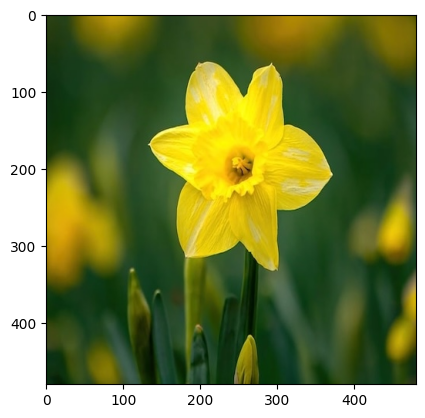

In [8]:
image = mpimg.imread('../../../Pictures/daffodil.jpg')
type(image)
plt.imshow(image)

(480, 480, 3)
[41 67 20]
(480, 480)
灰度形状: (480, 480)


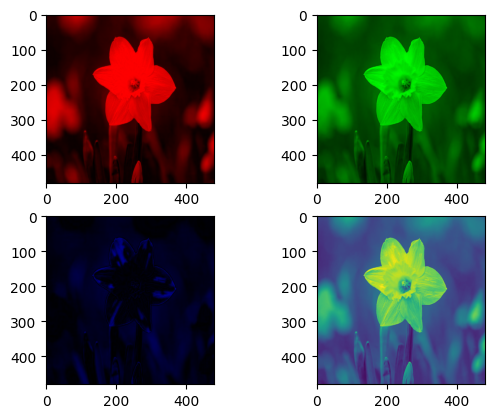

In [10]:
## 提取图片特征 -- 只能是方阵图片--正方形
## 提取图片特征
print(image.shape)
## 第一个像素点的rgb值
print(image[0, 0])
print(image[:,:,0].shape)

fig, ax = plt.subplots(2, 2)

## 红色通道
r_im = image.copy()
r_im[:,:,1]=0
r_im[:,:,2]=0
ax[0, 0].imshow(r_im)

## 绿色通道
g_im = image.copy()
g_im[:,:,0]=0
g_im[:,:,2]=0
ax[0,1].imshow(g_im)

## 蓝色通道
b_im = image.copy()
b_im[:,:,0]=0
b_im[:,:,1]=0
ax[1,0].imshow(b_im)

# 转换为灰度
gray_img = image.copy()
gray_img = np.dot(gray_img[..., :3], [0.2989, 0.5870, 0.1140])
print("灰度形状:", gray_img.shape) ## 3为图片转成2维了!!!
ax[1,1].imshow(gray_img)

plt.show()


In [ ]:
gray_matrix = np.matrix(gray_img)
eigvals, eigvecs = np.linalg.eig(gray_matrix)
print(eigvals.shape, eigvecs.shape)
diag = np.diag(eigvals)

fig = plt.figure()
fig.add_subplot(221)
### 保留全部特征
S = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
S = S.real ## 只拿实部
plt.imshow(S)

fig.add_subplot(222)
## 丢掉一半特征
eigvals[240:]=0
S1 = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
S1 = S1.real ## 只拿实部
plt.imshow(S1)

fig.add_subplot(223)
## 丢掉3/4特征
eigvals[120:]=0
S1 = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
S1 = S1.real ## 只拿实部
plt.imshow(S1)

fig.add_subplot(224)
## 丢掉7/8特征
eigvals[60:]=0
S1 = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
S1 = S1.real ## 只拿实部
plt.imshow(S1)

plt.show()

In [60]:
mat = np.matrix([[4, 11, 14], [3, 7, -2]])
U, sv, V = np.linalg.svd(mat, full_matrices=False)
print('U:', U)
print('sv:', sv)
print('V:', V)
print('U * U.T ', U * U.T)
print('V * V.T ', V * V.T)
sv = np.diag(sv)
print('U * sv * V', U * sv * V) ## 会报错,方阵问题

U: [[-0.97771635 -0.2099303 ]
 [-0.2099303   0.97771635]]
sv: [18.60369885  6.99302431]
V: [[-0.24407277 -0.6570947  -0.71320055]
 [ 0.29935944  0.6484721  -0.69990561]]
U * U.T  [[1.00000000e+00 9.25767111e-18]
 [9.25767111e-18 1.00000000e+00]]
V * V.T  [[ 1.00000000e+00 -8.42921037e-17]
 [-8.42921037e-17  1.00000000e+00]]
U * sv * V [[ 4. 11. 14.]
 [ 3.  7. -2.]]


灰度形状: (427, 640)


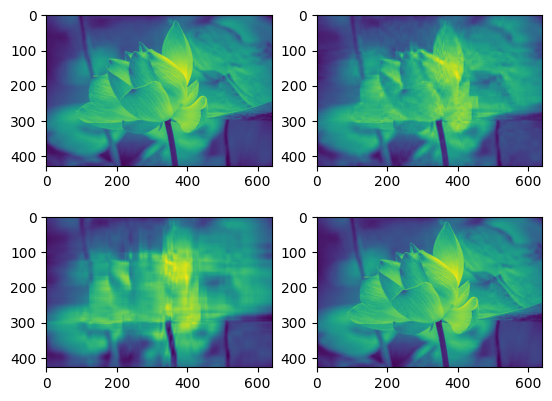

In [12]:
### 奇异值分解
## U x S x V = M, U和V都是正交矩阵, S是主对角线上有值,其他元素为0,那么S则称为M的奇异值
## 和特征值、特征向量的区别,就是奇异值类似因式分解,U和V是2个特征向量,sv是特征值
image2 = mpimg.imread('../../../Pictures/lotus.jpg')

# 转换为灰度
gray_img2 = image2.copy()
gray_img2 = np.dot(gray_img2[..., :3], [0.2989, 0.5870, 0.1140])
print("灰度形状:", gray_img2.shape) ## 3为图片转成2维了!!!

gi2 = np.matrix(gray_img2)
## full_matrices代表返回的U、V必须都是方阵,这样会导致逆运算的时候,U*sv*V不可计算
U, sv, V = np.linalg.svd(gi2, full_matrices=False)
# print('U shape:', U.shape)
# print(U * U.T)
# print('sv shape:', sv.shape)
# print('V shape:', V.shape)
# print(V * V.T)

fig = plt.figure()
fig.add_subplot(221)
### 保留全部特征
S = U * np.diag(sv) * V
plt.imshow(S)

fig.add_subplot(222)
## 只保留20个特征
sv[20:] = 0
S1 = U * np.diag(sv) * V
plt.imshow(S1)

fig.add_subplot(223)
## 只保留5个特征
sv[10:] = 0
S1 = U * np.diag(sv) * V
plt.imshow(S1)

fig.add_subplot(224)
## 原始图像
plt.imshow(gray_img2)

plt.show()


### `matplotlib.image` 简介

`matplotlib.image` 是 Matplotlib 提供的一个子模块，主要用于读取和处理图像数据。它的核心函数 `matplotlib.image.imread` 可以读取图像文件，并返回 NumPy 数组形式的图像数据。

函数签名：

```python
matplotlib.image.imread(fname, format=None)
```

- **fname**：文件路径。
- **format**：文件格式（可选，通常自动推断）。

默认情况下，`imread` 返回的图像数据是多通道的（例如 RGB 或 RGBA），但我们可以通过后续处理将其转换为单通道灰度图像。

---

### 读取图片并转换为灰度

`matplotlib.image.imread` 本身不提供直接的 `flatten` 或 `as_gray` 参数，因此需要手动转换。以下是实现方法：

#### 方法 1：使用加权平均法

RGB 到灰度的经典转换公式为：

\[ \text{Gray} = 0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B \]

#### 代码

```python
import matplotlib.image as mpimg
import numpy as np

# 读取图像
img = mpimg.imread('color_image.png')
print("原始图像形状:", img.shape)

# 转换为灰度
gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
print("灰度图像形状:", gray_img.shape)
```

---

#### 方法 2：使用 `np.mean`（简单平均）

如果不需要精确的加权，可以简单取 RGB 通道的平均值：

```python
import matplotlib.image as mpimg
import numpy as np

# 读取图像
img = mpimg.imread('color_image.png')
print("原始图像形状:", img.shape)

# 转换为灰度（平均值）
gray_img = np.mean(img[..., :3], axis=-1)
print("灰度图像形状:", gray_img.shape)
```

---

### 示例结果

假设 `color_image.png` 是一个 100x100 像素的 RGB 图像。

| 项目           | 方法 1（加权平均）         | 方法 2（简单平均）         |
|----------------|---------------------------|---------------------------|
| 原始形状       | (100, 100, 3)            | (100, 100, 3)            |
| 灰度形状       | (100, 100)               | (100, 100)               |
| 计算方式       | 0.2989*R + 0.5870*G + 0.1140*B | (R + G + B) / 3          |

- **输出**：
  - 原始图像：(100, 100, 3) 表示 100x100 像素，3 通道 (RGB)。
  - 灰度图像：(100, 100) 表示单通道灰度。

---

### 显示灰度图像

可以用 Matplotlib 显示转换后的灰度图像：

```python
import matplotlib.pyplot as plt

plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # 隐藏坐标轴
plt.show()
```

| 参数       | 说明                                      |
|------------|-------------------------------------------|
| cmap='gray'| 指定灰度颜色映射                          |
| axis('off')| 移除坐标轴以聚焦图像                      |

---

### 注意事项

| 项目           | 说明                                      |
|----------------|-------------------------------------------|
| 输入格式       | 支持 PNG、JPG 等，PNG 可能包含透明通道 (RGBA) |
| 数据范围       | 默认返回 float32，值在 [0, 1]，需注意类型 |
| RGBA 处理      | 若有透明通道，取前 3 通道（[..., :3]）     |
| 替代工具       | `imageio.imread` 或 `PIL.Image` 也可使用  |

- 如果图像是 RGBA（4 通道），需确保只处理 RGB 部分，否则 `np.dot` 或 `np.mean` 会出错。

---

### 与其他库对比

| 库/方法            | 直接灰度支持 | 代码示例                                      |
|--------------------|--------------|-----------------------------------------------|
| `matplotlib.image` | 否（需手动） | `np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])` |
| `imageio.imread`   | 是           | `imageio.imread('file', as_gray=True)`        |
| `PIL.Image`        | 是           | `Image.open('file').convert('L')`             |

- `matplotlib.image.imread` 需要额外步骤，而其他库提供内置灰度选项。

---

### 完整代码示例

```python
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# 读取图像
img = mpimg.imread('color_image.png')
print("原始形状:", img.shape)

# 转换为灰度
gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
print("灰度形状:", gray_img.shape)

# 显示图像
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()
```

---

### 总结

| 项目           | 内容                                      |
|----------------|-------------------------------------------|
| 是否支持       | 是，但需手动转换                          |
| 转换方法       | 加权平均（推荐）或简单平均                |
| 输出结果       | 从 (h, w, 3) 转为 (h, w) 的单通道数组     |
| 显示方式       | 使用 `plt.imshow` 和 `cmap='gray'`        |

如果你有具体图像文件想测试，或者需要优化代码，请告诉我，我可以进一步协助！